In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import pi, e, hbar, m_e, c, epsilon_0
from particles import beamParameters_inSingleRun
from matplotlib.ticker import MultipleLocator



# IMPORTANT - import from own scripts in different directories
# ############################################################
h5data_process    = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "visualize_qv3d", "h5data_process")
sys.path.append(h5data_process) # add the directory path into the memory where includes particles.py
from func import find_folders_with_pattern
#from from_input_deck import extract_value_from_input_deck

# Constants
# #########
E0 = 0.5110e6  # [eV] electron rest energy

# Plot optoins
# ############
fontsize = 12
fontsize14 = 14
figsize = (7, 4)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'navy'] # Define colors for plotting # in windows

# Enter simulation directory
# ###########################
#simulation_path = "/home/novac/Desktop/Projects/autorun_qv3d/temp/density-5.0e15"  # in linux
simulation_path = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "SCARF", "clara_plasmaScan_2beam")  # in windows
density_scan_dir_paths = find_folders_with_pattern(simulation_path, 'density')
num_scan_simulation = len(density_scan_dir_paths)

# Calculate beam parameters in each run and add to stack

In [26]:
all_beamdf = []
for sim_dir in density_scan_dir_paths:
    csvFile = os.path.join(sim_dir, "h5files", "witness_parameters.csv")
    beam_df, keys = beamParameters_inSingleRun(csvFile)
    all_beamdf.append(beam_df)
print(keys)

['position[cm]', 'energy[MeV]', 'energySpread[%]', 'charge[pC]', 'emittance[mm-mrad]', 'Plasma Density[/cm3]', 'Plasma Wavelength[cm]', 'Ewb[GV/m]']


# Extract main beam parameters and save in a new dataframe for easier analysis

In [27]:
all_position = []
all_energy = []
all_energySpread = []
all_charge = []
all_emittance = []
all_plasmadensities = []
all_lamdap = [] 
all_Ewb = []

print('Below output is the initial emittance (if higher than expected increase resolution in transverse)')
for df in all_beamdf:
    position = df['position[cm]']
    energy = df['energy[MeV]']
    energySpread = df['energySpread[%]']
    charge = df['charge[pC]']
    emittance = df['emittance[mm-mrad]']
    plasma_density = df['Plasma Density[/cm3]']
    Plasma_Wavelength = df['Plasma Wavelength[cm]']
    EWB = df['Ewb[GV/m]']
    
    
    # print initial emittance
    # #######################
    print('Plasma Density [/cm3] = ', f"{plasma_density[0]:.2e}", 'Emittance [mm-mrad] = ', f"{emittance[0]:.2f}")

    all_position.append(position)
    all_energy.append(energy)
    all_energySpread.append(energySpread)
    all_charge.append(charge)
    all_emittance.append(emittance)

    all_plasmadensities.append(plasma_density)
    all_lamdap.append(Plasma_Wavelength)
    all_Ewb.append(EWB)
    

Below output is the initial emittance (if higher than expected increase resolution in transverse)
Plasma Density [/cm3] =  5.00e+14 Emittance [mm-mrad] =  5.80
Plasma Density [/cm3] =  6.00e+14 Emittance [mm-mrad] =  5.76
Plasma Density [/cm3] =  7.00e+14 Emittance [mm-mrad] =  5.30
Plasma Density [/cm3] =  8.00e+14 Emittance [mm-mrad] =  5.30
Plasma Density [/cm3] =  9.00e+14 Emittance [mm-mrad] =  5.38
Plasma Density [/cm3] =  1.00e+15 Emittance [mm-mrad] =  5.33
Plasma Density [/cm3] =  2.00e+15 Emittance [mm-mrad] =  5.28
Plasma Density [/cm3] =  3.00e+15 Emittance [mm-mrad] =  5.05
Plasma Density [/cm3] =  4.00e+15 Emittance [mm-mrad] =  5.05
Plasma Density [/cm3] =  5.00e+15 Emittance [mm-mrad] =  5.08
Plasma Density [/cm3] =  6.00e+15 Emittance [mm-mrad] =  5.07
Plasma Density [/cm3] =  7.00e+15 Emittance [mm-mrad] =  5.03
Plasma Density [/cm3] =  8.00e+15 Emittance [mm-mrad] =  5.06
Plasma Density [/cm3] =  9.00e+15 Emittance [mm-mrad] =  5.03
Plasma Density [/cm3] =  1.00e+16 

# Separate parameter at positions of 0, 5, 10, 15, 20 and 25 cm

In [28]:
# at the beginning
# ################
energy0 = []
energySpread0 = []
charge0 = []
emittance0 = []
np_scan = []
lamdap_scan = []
Ewb_scan = []

# at 5 cm 
# #######
energy5 = []
energySpread5 = []
charge5 = []
emittance5 = []
    
# at 10 cm 
# ########
energy10 = []
energySpread10 = []
charge10 = []
emittance10 = []

# at 15 cm 
# ########
energy15 = []
energySpread15 = []
charge15 = []
emittance15 = []

# at 20 cm
# ########
energy20 = []
energySpread20 = []
charge20 = []
emittance20 = []

# at 25 cm
# ########
energy25 = []
energySpread25 = []
charge25 = []
emittance25 = []

for i in range(num_scan_simulation):
    # at the beginning
    # ################
    energy0.append(all_energy[i][0])
    energySpread0.append(all_energySpread[i][0])
    charge0.append(all_charge[i][0])
    emittance0.append(all_emittance[i][0])
    np_scan.append(all_plasmadensities[i][0])
    lamdap_scan.append(all_lamdap[i][0])
    Ewb_scan.append(all_Ewb[i][0])
    
    # at 5 cm 
    # #######
    energy5.append(all_energy[i][1])
    energySpread5.append(all_energySpread[i][1])
    charge5.append(all_charge[i][1])
    emittance5.append(all_emittance[i][1])

    
    # at 10 cm 
    # ########
    energy10.append(all_energy[i][2])
    energySpread10.append(all_energySpread[i][2])
    charge10.append(all_charge[i][2])
    emittance10.append(all_emittance[i][2])
    
    # at 15 cm 
    # ########
    energy15.append(all_energy[i][3])
    energySpread15.append(all_energySpread[i][3])
    charge15.append(all_charge[i][3])
    emittance15.append(all_emittance[i][3])
    
    # at 20 cm
    # ########
    energy20.append(all_energy[i][4])
    energySpread20.append(all_energySpread[i][4])
    charge20.append(all_charge[i][4])
    emittance20.append(all_emittance[i][4])
    
    # at 25 cm
    # ########
    energy25.append(all_energy[i][5])
    energySpread25.append(all_energySpread[i][5])
    charge25.append(all_charge[i][5])
    emittance25.append(all_emittance[i][5])
    

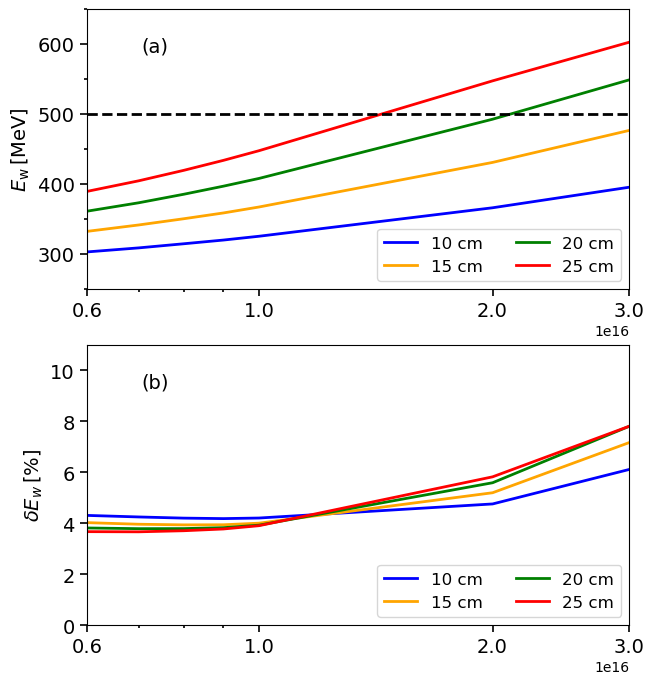

In [29]:
figsize = (7, 8)  # Taller height for a 3-row vertical layout
fig, axes = plt.subplots(2, 1, figsize=figsize)  # 3 rows, 1 column

# Repeat the process for each subplot:
###############################################
# Plot 1: Witness Energy
ax = axes[0]
ax.tick_params(which='both', width=1.2)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

ax.plot(np_scan, energy10, color=colors[0], linestyle='-', linewidth=2, label='10 cm')
ax.plot(np_scan, energy15, color=colors[1], linestyle='-', linewidth=2, label='15 cm')
ax.plot(np_scan, energy20, color=colors[2], linestyle='-', linewidth=2, label='20 cm')
ax.plot(np_scan, energy25, color=colors[3], linestyle='-', linewidth=2, label='25 cm')

ax.set_xscale('log')
ax.set_xlim(6e15, 3e16)  # Ensure xlim is correctly applied
ax.set_xticks([6e15, 1e16, 2e16, 3e16])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

ax.set_ylim(250, 650)
ax.axhline(y=500, color='k', linestyle='--', linewidth=2)
ax.set_ylabel(r'$E_\mathrm{w} \, [\mathrm{MeV}]$', fontsize=fontsize14)
ax.text(0.1, 0.9, '(a)', transform=ax.transAxes, fontsize=fontsize14, verticalalignment='top')
ax.legend(ncol=2, loc='lower right', fontsize=fontsize)
ax.yaxis.set_major_locator(MultipleLocator(100))  # Minor ticks every 5 units
ax.yaxis.set_minor_locator(MultipleLocator(50))  # Minor ticks every 5 units
ax.tick_params(axis='both', which='major', labelsize=fontsize14)  # Change 14 to your desired font size

###############################################
# Plot 2: Energy Spread
ax = axes[1]
ax.tick_params(which='both', width=1.2)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

ax.plot(np_scan, energySpread10, color=colors[0], linestyle='-', linewidth=2, label='10 cm')
ax.plot(np_scan, energySpread15, color=colors[1], linestyle='-', linewidth=2, label='15 cm')
ax.plot(np_scan, energySpread20, color=colors[2], linestyle='-', linewidth=2, label='20 cm')
ax.plot(np_scan, energySpread25, color=colors[3], linestyle='-', linewidth=2, label='25 cm')

ax.set_xscale('log')
ax.set_xlim(6e15, 3e16)  # Explicitly set xlim
ax.set_xticks([6e15, 1e16, 2e16, 3e16])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

ax.set_ylim(0, 11)
ax.set_ylabel(r'$\delta E_w\, [\%]$', fontsize=fontsize14)
ax.text(0.1, 0.9, '(b)', transform=ax.transAxes, fontsize=fontsize14, verticalalignment='top')
ax.legend(ncol=2, loc='lower right', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize14)  # Change 14 to your desired font size

plt.savefig('witness.pdf', dpi=100, bbox_inches='tight')
plt.savefig('witness.png', dpi=100, bbox_inches='tight')
plt.show()